In [4]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

from nowcast import analyze, research_VENUS
from salishsea_tools import viz_tools
import os
import scipy.io as sio

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy = grid.variables['Bathymetry']
mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

In [10]:
path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/'

data = sio.loadmat(os.path.join(path, 'CODAR_region_20141126_20150426_w'))
wstruc = data['wstruc']
lons=wstruc['lons'][0,0]
lats=wstruc['lats'][0,0]
depths=wstruc['deptht'][0,0]

In [11]:
def cph2rps(freq):
    """Convert frequency in cycles per hours to radians per second"""
    return freq*2*np.pi/3600

In [12]:
def get_displacement(wstrc, const):
    
    var = wstruc[const]
    freq = cph2rps(var[0,0]['freq'][0,0])

    amp = var[0, 0]['ampl'][0, 0][:]
    amp = np.ma.masked_invalid(amp)

    phase = var[0, 0]['phas'][0, 0][:]
    phase = np.ma.masked_invalid(phase)
    
    amp = amp/freq
    phase = phase+90
    
    return amp, phase

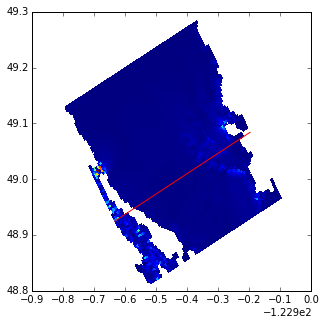

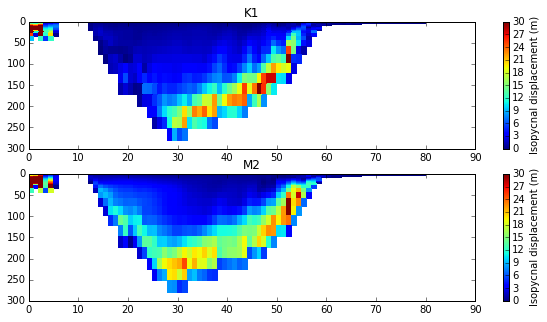

In [72]:
j=30
vmin=0
vmax=30
fig,ax=plt.subplots(1,1,figsize=(5,5))
const='M2'
amp,phase = get_displacement(wstruc, const)
ax.pcolormesh(lons,lats,amp[:,:,0])
ax.plot([lons[0,j],lons[-1,j]],[lats[0,j],lats[-1,j]],'r')

fig,axs=plt.subplots(2,1,figsize=(10,5))

for const, ax in zip(['K1','M2'], axs):
    amp,phase = get_displacement(wstruc, const)
    mesh=ax.pcolormesh(np.arange(amp[:,j,:].shape[0]), depths, amp[:,j,:].T,vmin=vmin,vmax=vmax)
    ax.set_ylim([300,0])
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('Isopycnal displacement (m)')
    ax.set_title(const)

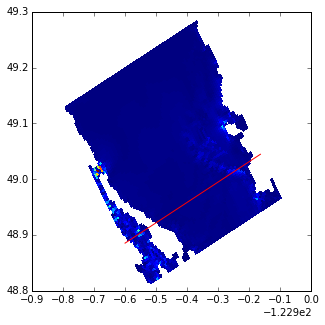

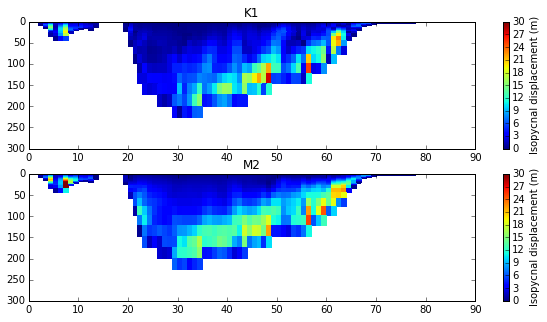

In [75]:
j=20
fig,ax=plt.subplots(1,1,figsize=(5,5))
const='M2'
amp,phase = get_displacement(wstruc, const)
ax.pcolormesh(lons,lats,amp[:,:,0])
ax.plot([lons[0,j],lons[-1,j]],[lats[0,j],lats[-1,j]],'r')


fig,axs=plt.subplots(2,1,figsize=(10,5))

for const, ax in zip(['K1','M2'], axs):
    amp,phase = get_displacement(wstruc, const)
    mesh=ax.pcolormesh(np.arange(amp[:,j,:].shape[0]), depths, amp[:,j,:].T,vmin=vmin,vmax=vmax)
    ax.set_ylim([300,0])
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('Isopycnal displacement (m)')
    ax.set_title(const)

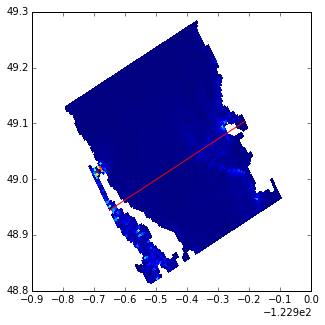

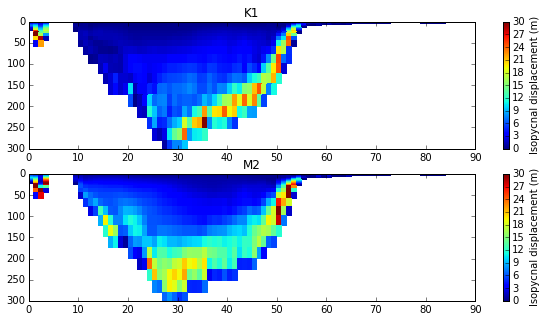

In [77]:
j=35

fig,ax=plt.subplots(1,1,figsize=(5,5))
const='M2'
amp,phase = get_displacement(wstruc, const)
ax.pcolormesh(lons,lats,amp[:,:,0])
ax.plot([lons[0,j],lons[-1,j]],[lats[0,j],lats[-1,j]],'r')

fig,axs=plt.subplots(2,1,figsize=(10,5))
for const, ax in zip(['K1','M2'], axs):
    amp,phase = get_displacement(wstruc, const)
    mesh=ax.pcolormesh(np.arange(amp[:,j,:].shape[0]), depths, amp[:,j,:].T,vmin=vmin,vmax=vmax)
    ax.set_ylim([300,0])
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('Isopycnal displacement (m)')
    ax.set_title(const)